In [34]:
import os


files = os.listdir('../videos')
files = [f for f in files if f.endswith('.csv')]
files

['2024-04-23.csv',
 '2024-04-22.csv',
 '2024-04-20.csv',
 '2024-04-21.csv',
 '2024-04-19.csv',
 '2024-04-25.csv',
 '2024-04-24.csv',
 '2024-04-30.csv',
 '2024-04-18.csv',
 '2024-04-26.csv',
 'all_videos.csv',
 '2024-04-27.csv',
 '2024-05-01.csv',
 '2024-05-03.csv',
 '2024-05-02.csv',
 '2024-05-06.csv',
 '2024-05-07.csv',
 '2024-05-05.csv',
 '2024-05-04.csv',
 '2024-04-16.csv',
 '2024-04-17.csv',
 '2024-04-15.csv',
 '2024-04-29.csv',
 '2024-04-28.csv']

In [35]:
# Combine all the csv files into one
import pandas as pd

df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
df = df.drop_duplicates()
df.to_csv('../videos/all_videos.csv', index=False)

In [36]:
# Load the combined csv file
df = pd.read_csv('../videos/all_videos.csv')

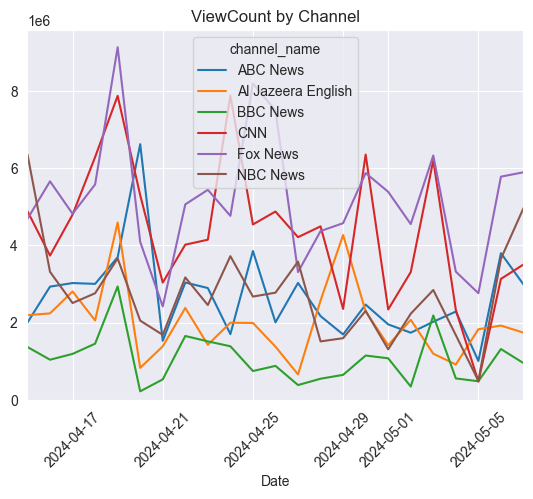

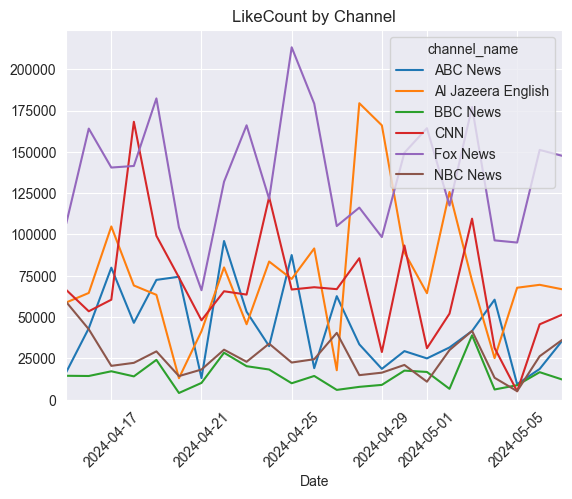

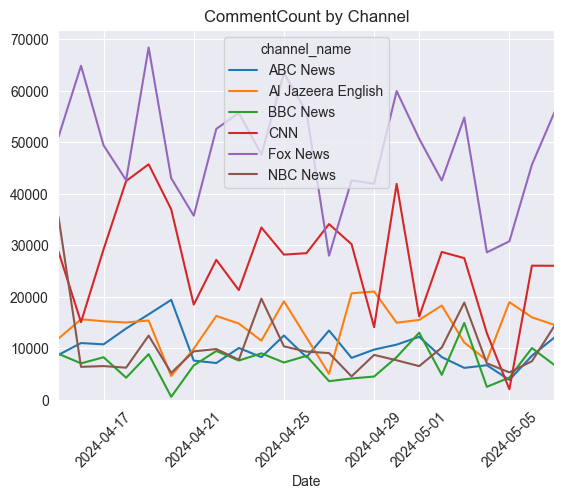

In [37]:
# Plot ViewCount and LikeCount for each channel by day
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['published_at']).dt.date
df['view_count'] = df['view_count'].fillna(0).astype(int)
df['like_count'] = df['like_count'].fillna(0).astype(int)
df['comment_count'] = df['comment_count'].fillna(0).astype(int)

df.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().plot()
plt.title('ViewCount by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

df.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().plot()
plt.title('LikeCount by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

df.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().plot()
plt.title('CommentCount by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

In [38]:
political_words = ['trump', 'biden', 'democrat', 'republican']
political_df = df[df['video_title'].str.contains('|'.join(political_words), case=False)]

<Figure size 1000x600 with 0 Axes>

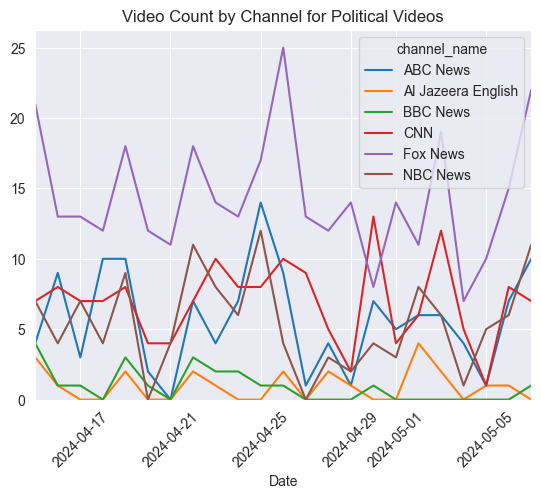

<Figure size 1000x600 with 0 Axes>

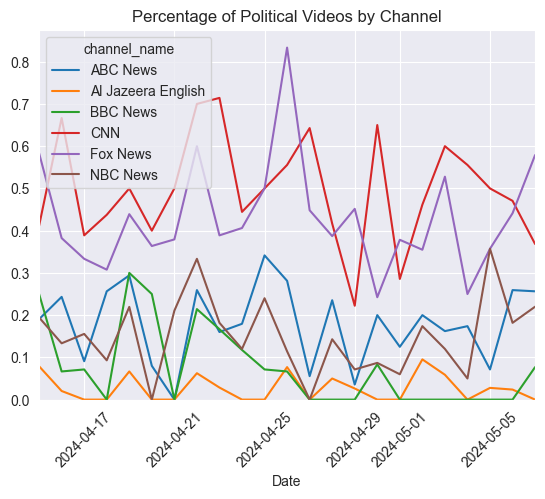

<Figure size 1000x600 with 0 Axes>

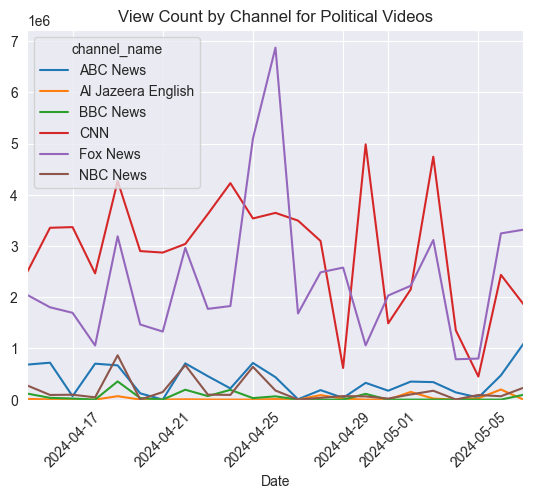

<Figure size 1000x600 with 0 Axes>

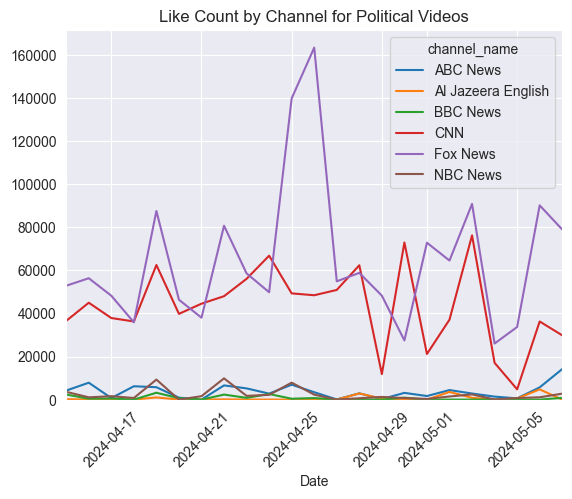

<Figure size 1000x600 with 0 Axes>

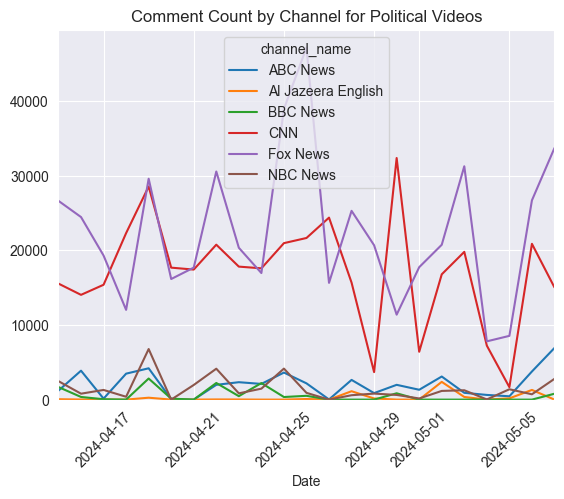

In [39]:
# video raw count
plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0).plot()
plt.title('Video Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

# percentage of political videos to the total videos
plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0).div(df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0)).plot()
plt.title('Percentage of Political Videos by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0).plot()
plt.title('View Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0).plot()
plt.title('Like Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0).plot()
plt.title('Comment Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# CNN and Fox News
cnn_fox = df[df['channel_name'].isin(['CNN', 'Fox News'])]
cnn_fox

,channel_name,video_title,published_at,video_id,view_count,like_count,comment_count,Date
25,Fox News,‘The Five’: Kamala receives ‘brutal’ feedback ...,2024-04-23T23:30:09Z,ftU67hCYlvc,601874,10857,2533,2024-04-23
26,Fox News,Tyrus: We have a terrorist group marching in N...,2024-04-23T22:45:00Z,KisbbLuB-WQ,409073,18953,5424,2024-04-23
27,Fox News,‘The Five’: Trump clashes with prosecutors ove...,2024-04-23T22:00:14Z,QHh9B2VXO60,232233,6089,2479,2024-04-23
28,Fox News,Biden ripped over cannibal claim: &#39;A plagi...,2024-04-23T21:15:00Z,a82pVg2ndP4,81678,2633,1259,2024-04-23
29,Fox News,Trump: The gag order is &#39;totally unconstit...,2024-04-23T20:26:41Z,Rl14by2FRGw,57359,1395,1878,2024-04-23
...,...,...,...,...,...,...,...,...
3648,Fox News,Peter Doocy: This will be a big headache for B...,2024-05-07T14:45:00Z,5O1fPw6Yylw,201271,4227,1090,2024-05-07
3649,Fox News,Secret Service discussing possibility of Trump...,2024-05-07T13:30:23Z,ViRvg7EhK2A,225199,3174,2337,2024-05-07
3650,Fox News,We have ‘no idea’ if Hamas has really agreed t...,2024-05-07T06:00:11Z,IDXTaybGkrM,46180,1089,351,2024-05-07
3651,CNN,See moment Tyla is carried up Met Gala steps,2024-05-07T15:42:21Z,wu3DYTaR9Vo,30771,684,82,2024-05-07


<Figure size 1000x600 with 0 Axes>

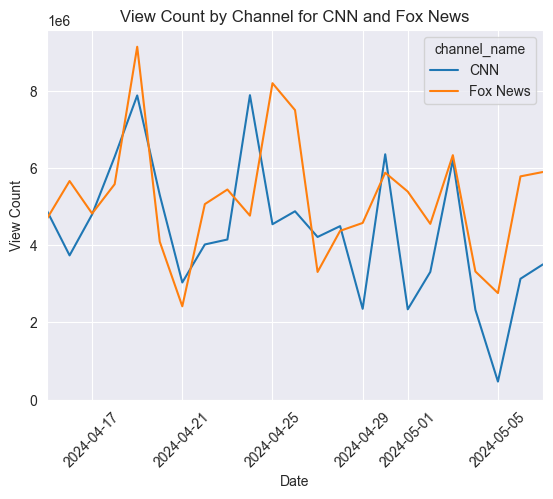

<Figure size 1000x600 with 0 Axes>

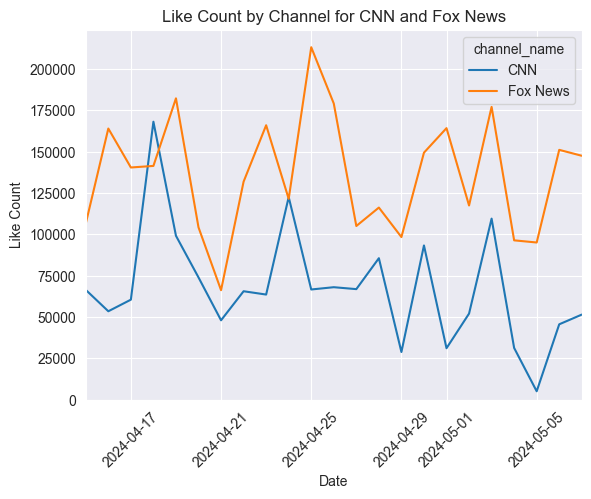

<Figure size 1000x600 with 0 Axes>

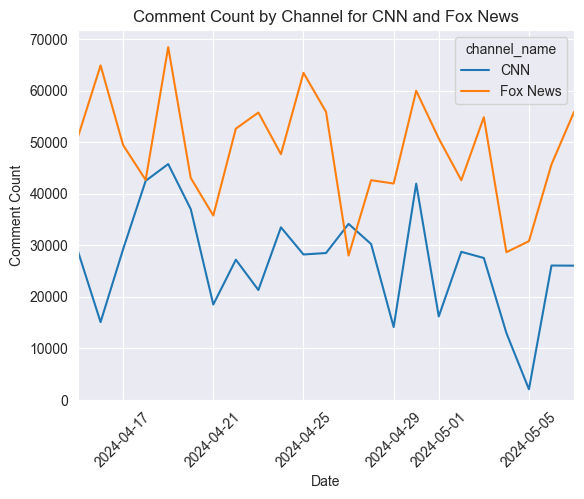

In [41]:
# Plot filled line chart
plt.figure(figsize=(10, 6))
cnn_fox.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0).plot()
plt.title('View Count by Channel for CNN and Fox News')
plt.xticks(rotation=45)
plt.ylabel('View Count')
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
cnn_fox.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0).plot()
plt.title('Like Count by Channel for CNN and Fox News')
plt.xticks(rotation=45)
plt.ylabel('Like Count')
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

# Plot filled line chart
plt.figure(figsize=(10, 6))
cnn_fox.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0).plot()
plt.title('Comment Count by Channel for CNN and Fox News')
plt.xticks(rotation=45)
plt.ylabel('Comment Count')
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

In [42]:
# Initialize appearance column with default value
cnn_fox['appearance'] = -1

# Iterate over each row and update appearance column based on video title
for index, row in cnn_fox.iterrows():
    title_lower = row['video_title'].lower()
    if 'trump' in title_lower and 'biden' not in title_lower:
        cnn_fox.at[index, 'appearance'] = 0
    elif 'biden' in title_lower and 'trump' not in title_lower:
        cnn_fox.at[index, 'appearance'] = 1
    elif 'biden' in title_lower and 'trump' in title_lower:
        cnn_fox.at[index, 'appearance'] = 2

/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_7178/3238663859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnn_fox['appearance'] = -1


In [43]:
cnn_fox

,channel_name,video_title,published_at,video_id,view_count,like_count,comment_count,Date,appearance
25,Fox News,‘The Five’: Kamala receives ‘brutal’ feedback ...,2024-04-23T23:30:09Z,ftU67hCYlvc,601874,10857,2533,2024-04-23,-1
26,Fox News,Tyrus: We have a terrorist group marching in N...,2024-04-23T22:45:00Z,KisbbLuB-WQ,409073,18953,5424,2024-04-23,-1
27,Fox News,‘The Five’: Trump clashes with prosecutors ove...,2024-04-23T22:00:14Z,QHh9B2VXO60,232233,6089,2479,2024-04-23,0
28,Fox News,Biden ripped over cannibal claim: &#39;A plagi...,2024-04-23T21:15:00Z,a82pVg2ndP4,81678,2633,1259,2024-04-23,1
29,Fox News,Trump: The gag order is &#39;totally unconstit...,2024-04-23T20:26:41Z,Rl14by2FRGw,57359,1395,1878,2024-04-23,0
...,...,...,...,...,...,...,...,...,...
3648,Fox News,Peter Doocy: This will be a big headache for B...,2024-05-07T14:45:00Z,5O1fPw6Yylw,201271,4227,1090,2024-05-07,1
3649,Fox News,Secret Service discussing possibility of Trump...,2024-05-07T13:30:23Z,ViRvg7EhK2A,225199,3174,2337,2024-05-07,0
3650,Fox News,We have ‘no idea’ if Hamas has really agreed t...,2024-05-07T06:00:11Z,IDXTaybGkrM,46180,1089,351,2024-05-07,-1
3651,CNN,See moment Tyla is carried up Met Gala steps,2024-05-07T15:42:21Z,wu3DYTaR9Vo,30771,684,82,2024-05-07,-1


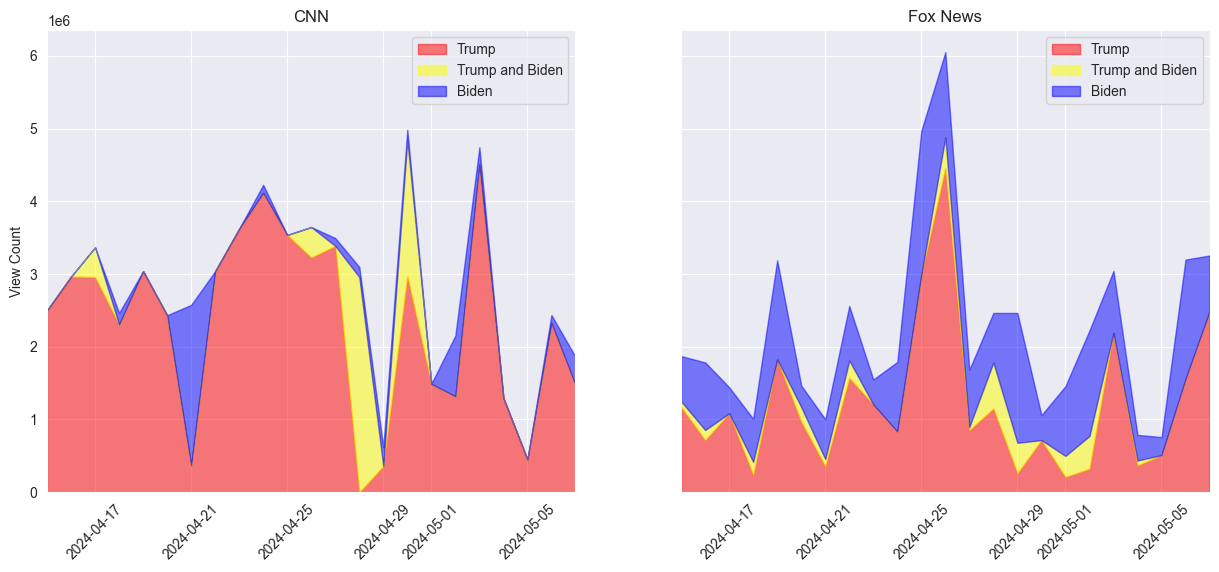

In [44]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('View Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()


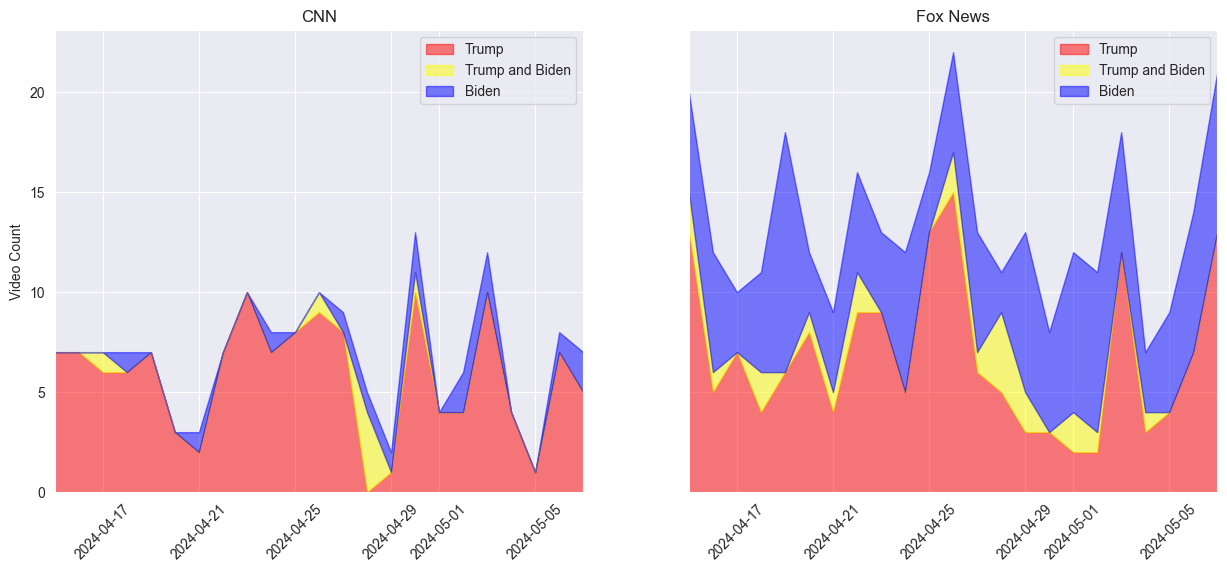

In [45]:
# raw video count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
    
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Video Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
    
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()


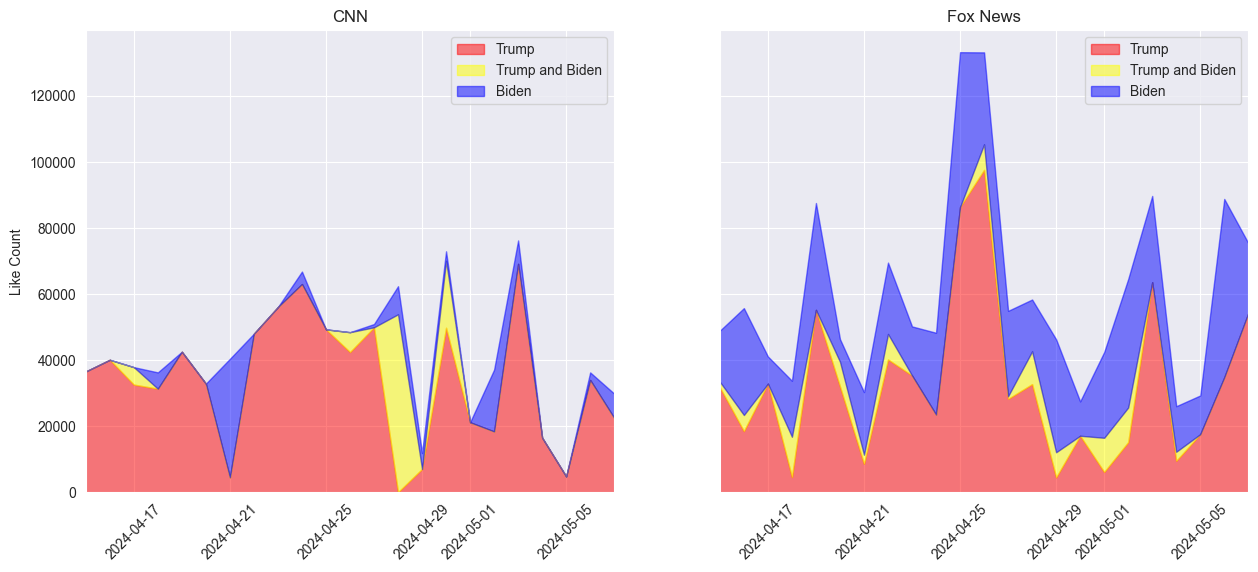

In [46]:
# like count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Like Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

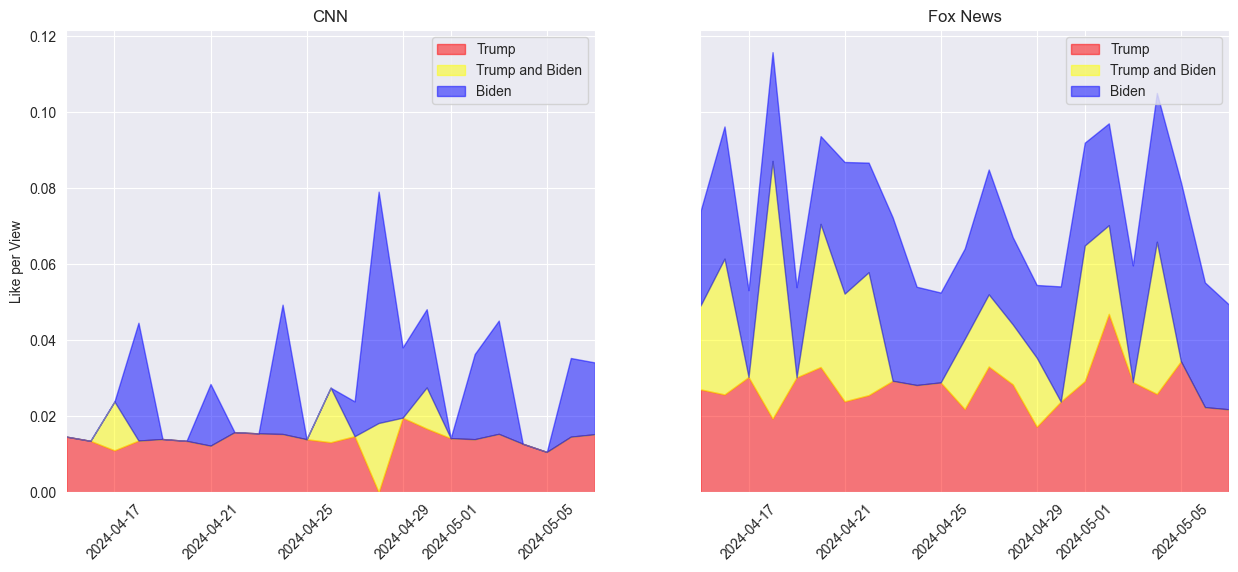

In [47]:
# like per view
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Like per View')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

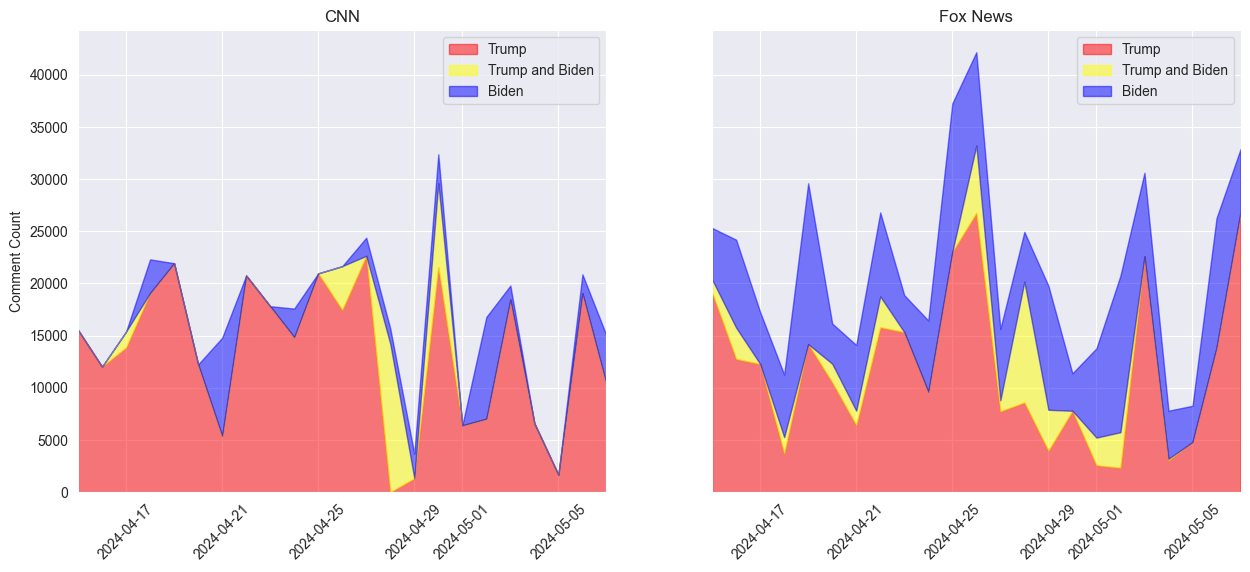

In [48]:
# comment count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Comment Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

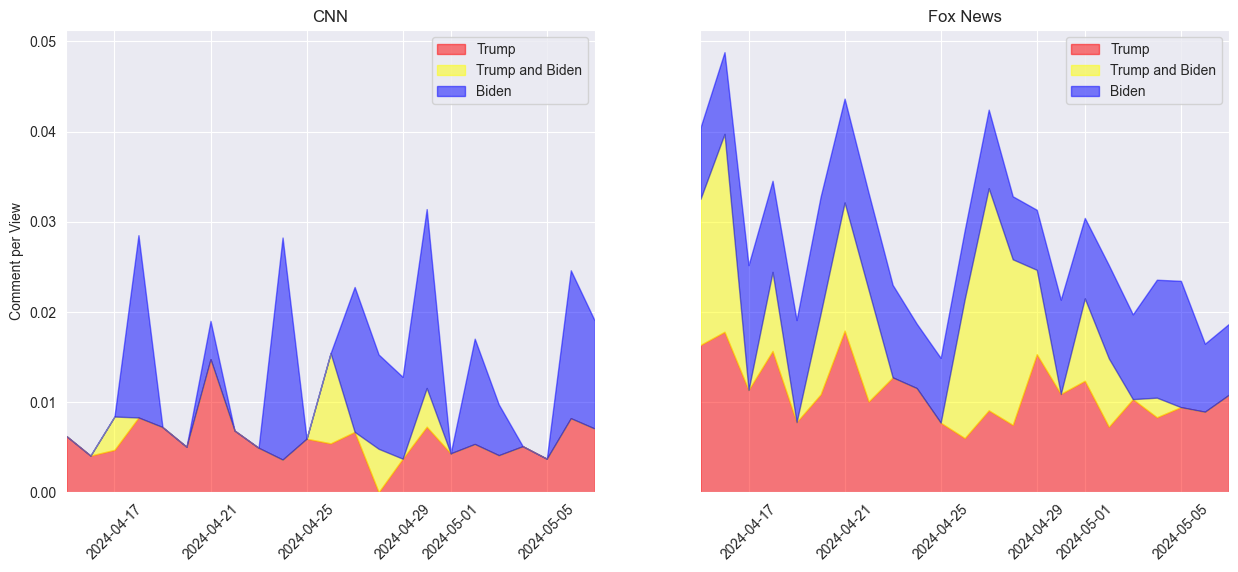

In [49]:
# comment per view
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)
    
ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)
    
ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Comment per View')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()